# Model Training Script
### This script is used to create SVM Classifier model for classifying mango variety using feature vector of mango leaf.

In [173]:
import os
import numpy as np
import pandas
import joblib
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Prepare dataset directory and load dataset csv file into Pandas DataFrame

In [174]:
# Leaves Dataset Folder Name
dataset_folder = 'PreprocessedDatabase'
# Leaves Dataset File Name
dataset_filename = 'labeled_dataset_max.csv'
# Current working directory
cwd = os.getcwd()
# Load the dataset from CSV file into pandas DataFrame
data = pandas.read_csv(os.path.join(cwd, dataset_folder, dataset_filename))

### Create lists of feature vectors and corresponding labels from dataframe

In [175]:
# Mapping of string labels to numeric value
classes = ['alphonso', 'amrapali', 'chaunsa', 'dasheri', 'langra']
label_map = {
    'alphonso': 0,
    'amrapali': 1,
    'chausa': 2,
    'dusheri': 3,
    'langra': 4
}
# List of feature vectors
X = data.iloc[:, :len(data.columns)-1].to_numpy(copy=True)
# List of corresponding label to each feature vector
Y = data.iloc[:,-1].to_numpy(copy=True)
# Map string labels to numeric values
Y = np.array([label_map[label] for label in Y])

### Create and Split Training and Test Data

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, shuffle=False)

### Train and Test Support Vector Classifier

In [177]:
# Train SVM Model using training data
svm_model = svm.SVC(kernel='poly',degree=8, C=1, decision_function_shape='ovo').fit(X_train, Y_train)

# Model predictions using test data
svm_predictions = svm_model.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model.score(X_test, Y_test)
  
# creating a confusion matrix
cm = confusion_matrix(Y_test, svm_predictions)

In [178]:
print(accuracy)

0.8547486033519553


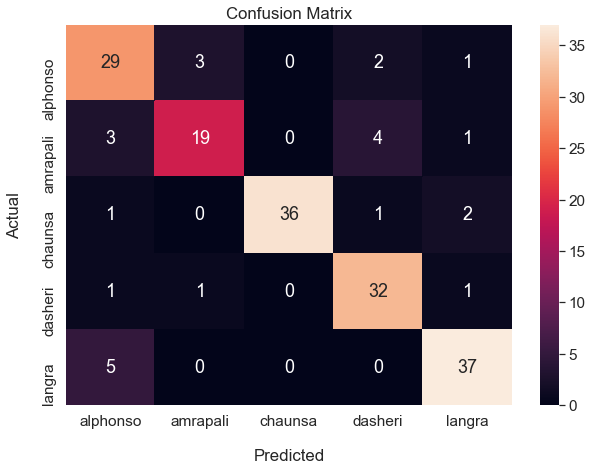

In [193]:
df_cm = pandas.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}) # font size
plt.xlabel('Predicted', labelpad=20)
plt.ylabel('Actual', labelpad=20)
plt.show()

### Serialize SVM model to a file

In [180]:
model_file_name = "mango_leaf_classifier.svm"
# Writes SVM model to a file
joblib.dump(svm_model, model_file_name)

['mango_leaf_classifier.svm']